In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from fbprophet import Prophet

In [2]:
a=pd.read_excel("/home/jash/Desktop/prophet/forecast.xlsx")



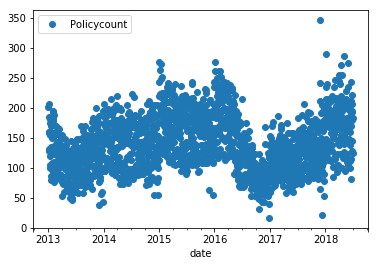

In [3]:
a.plot(x='date', y='Policycount', style='o')
a.rename(columns={'date': 'ds', 'Policycount': 'y'}, inplace = True)


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


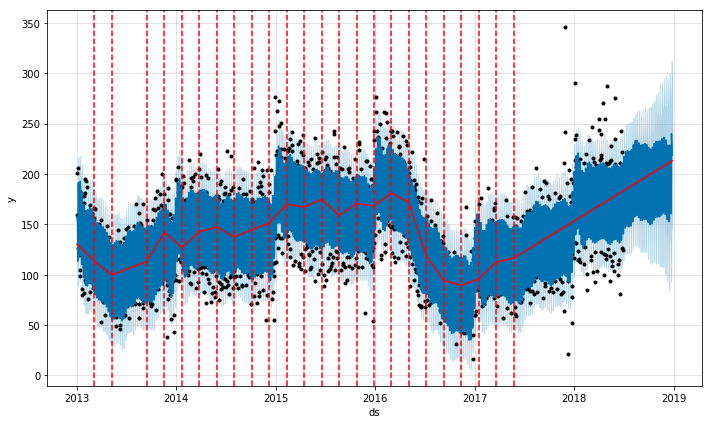

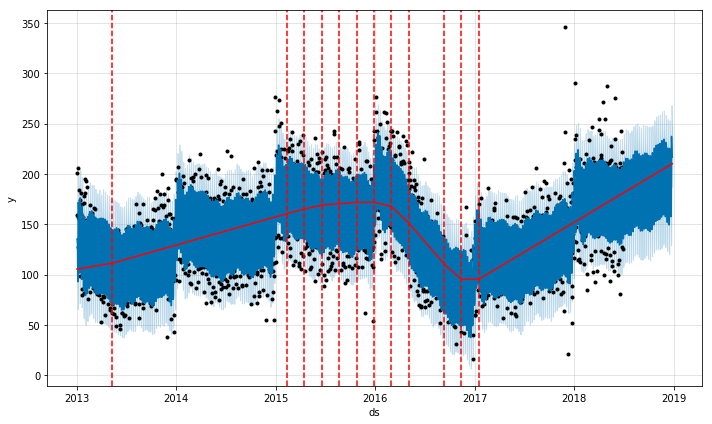

In [4]:
def forecasting(cps,period,dataframe):
    from fbprophet.plot import add_changepoints_to_plot
    changed=Prophet(changepoint_prior_scale=cps)
    changed.fit(dataframe)
    future=changed.make_future_dataframe(periods=period)
    forecast=changed.predict(future)
    fig=changed.plot(forecast)
    p=add_changepoints_to_plot(fig.gca(),changed,forecast)
    return changed

changed1=forecasting(10,180,a)
changed2=forecasting(.05,180,a)



In [5]:
print a.iloc[1790]

ds    2017-11-27 00:00:00
y                     346
Name: 1790, dtype: object


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


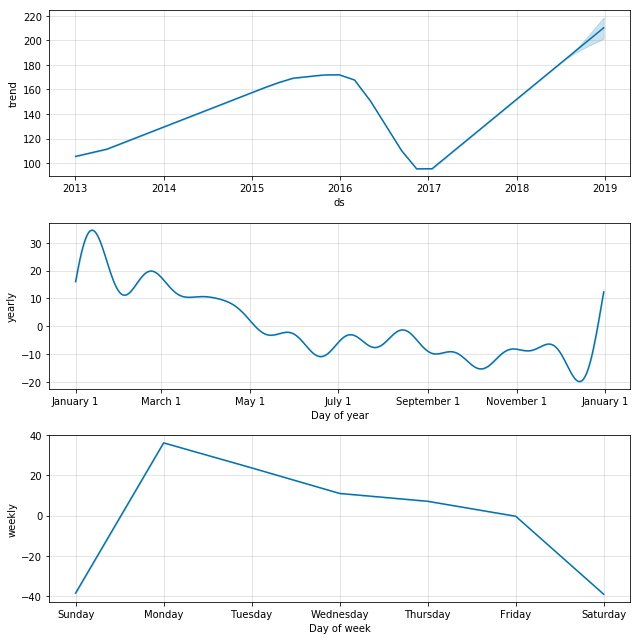

In [6]:
def plot_comp(dataframe,cps,period):
    m=Prophet(changepoint_prior_scale=cps)
    m.fit(dataframe)
    future=m.make_future_dataframe(periods=period)
    forecast=m.predict(future)
    fig = m.plot_components(forecast)

plot_comp(a,.05,180)


In [7]:
for i in range(len(a)):
    if(a.iloc[i]['y']>280):
        a.iloc[i]['y']=220
print a.iloc[1790]

ds    2017-11-27 00:00:00
y                     346
Name: 1790, dtype: object


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


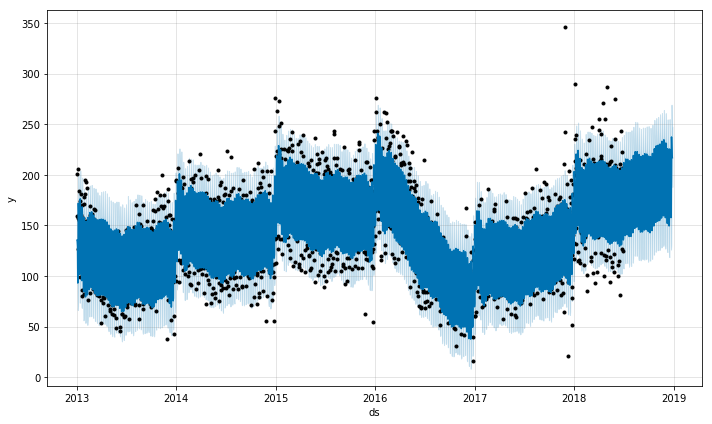

In [8]:
def simpleforecast(cps,period,dataframe):
    changed=Prophet(changepoint_prior_scale=cps)
    changed.fit(dataframe)
    future=changed.make_future_dataframe(periods=period)
    forecast=changed.predict(future)
    fig=changed.plot(forecast)
    return changed

changed=simpleforecast(.05,180,a)

In [9]:
def simpleforecastwithoutplot(cps,period,dataframe):
    changed=Prophet(changepoint_prior_scale=cps)
    changed.fit(dataframe)
    future=changed.make_future_dataframe(periods=period)
    forecast=changed.predict(future)
    return changed

changed=simpleforecastwithoutplot(.05,180,a)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
from fbprophet.diagnostics import cross_validation

def last6monthscrossval(dataframe,init,per,hor,cps,period):
    m=simpleforecastwithoutplot(cps,period,dataframe)
    df_cv = cross_validation(m, initial=str(init)+'days', period=str(per)+'days', horizon =str(hor)+'days')
    df_cv.tail()
    last6=df_cv.iloc[-181:]
    last6 = last6.reset_index(drop=True)
    return last6

last6=last6monthscrossval(a,365,180,180,.05,180)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00


In [11]:
#calculating mape for the last 6 months

def last6averagemape(last6):
    mape=np.zeros(shape=(len(last6),1))
    for i in range(len(last6)):
        mape[i]=math.fabs((last6.iloc[i]['yhat']-last6.loc[i]['y'])/last6.iloc[i]['y'])
    return np.mean(mape)*100 
    
t=last6averagemape(last6)


In [18]:
#finding minimum mape for various cps values
def findoptcps(dataframe,init,per,hor):
    k=0.5
    mapes=np.zeros(shape=(10,1))
    k_values=np.zeros(shape=(10,1))
    while(k<5):        
        last6=last6monthscrossval(a,365,180,180,k,180)
        i=int((k/.5)-1)
        mapes[i]=last6averagemape(last6)
        k_values[i]=k
        print "k=",k,"done"
        k=k+.5
    return mapes,k_values    
    

mapes,k_values=findoptcps(a,730,180,180)
        
    

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 0.5 done


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 1.0 done


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 1.5 done


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 2.0 done


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 2.5 done


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 3.0 done


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 3.5 done


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


k= 4.0 done


INFO:fbprophet.diagnostics:Making 9 forecasts with cutoffs between 2014-01-22 00:00:00 and 2018-01-01 00:00:00


k= 4.5 done


In [ ]:
#finding minimum values among all these
plt.plot(k_values,mapes)
min_index=np.argmin(mapes)
print "min index is",min_index
print "minimum mape is",mapes[min_index],"for changepoint prior scale =",k_values[min_index]

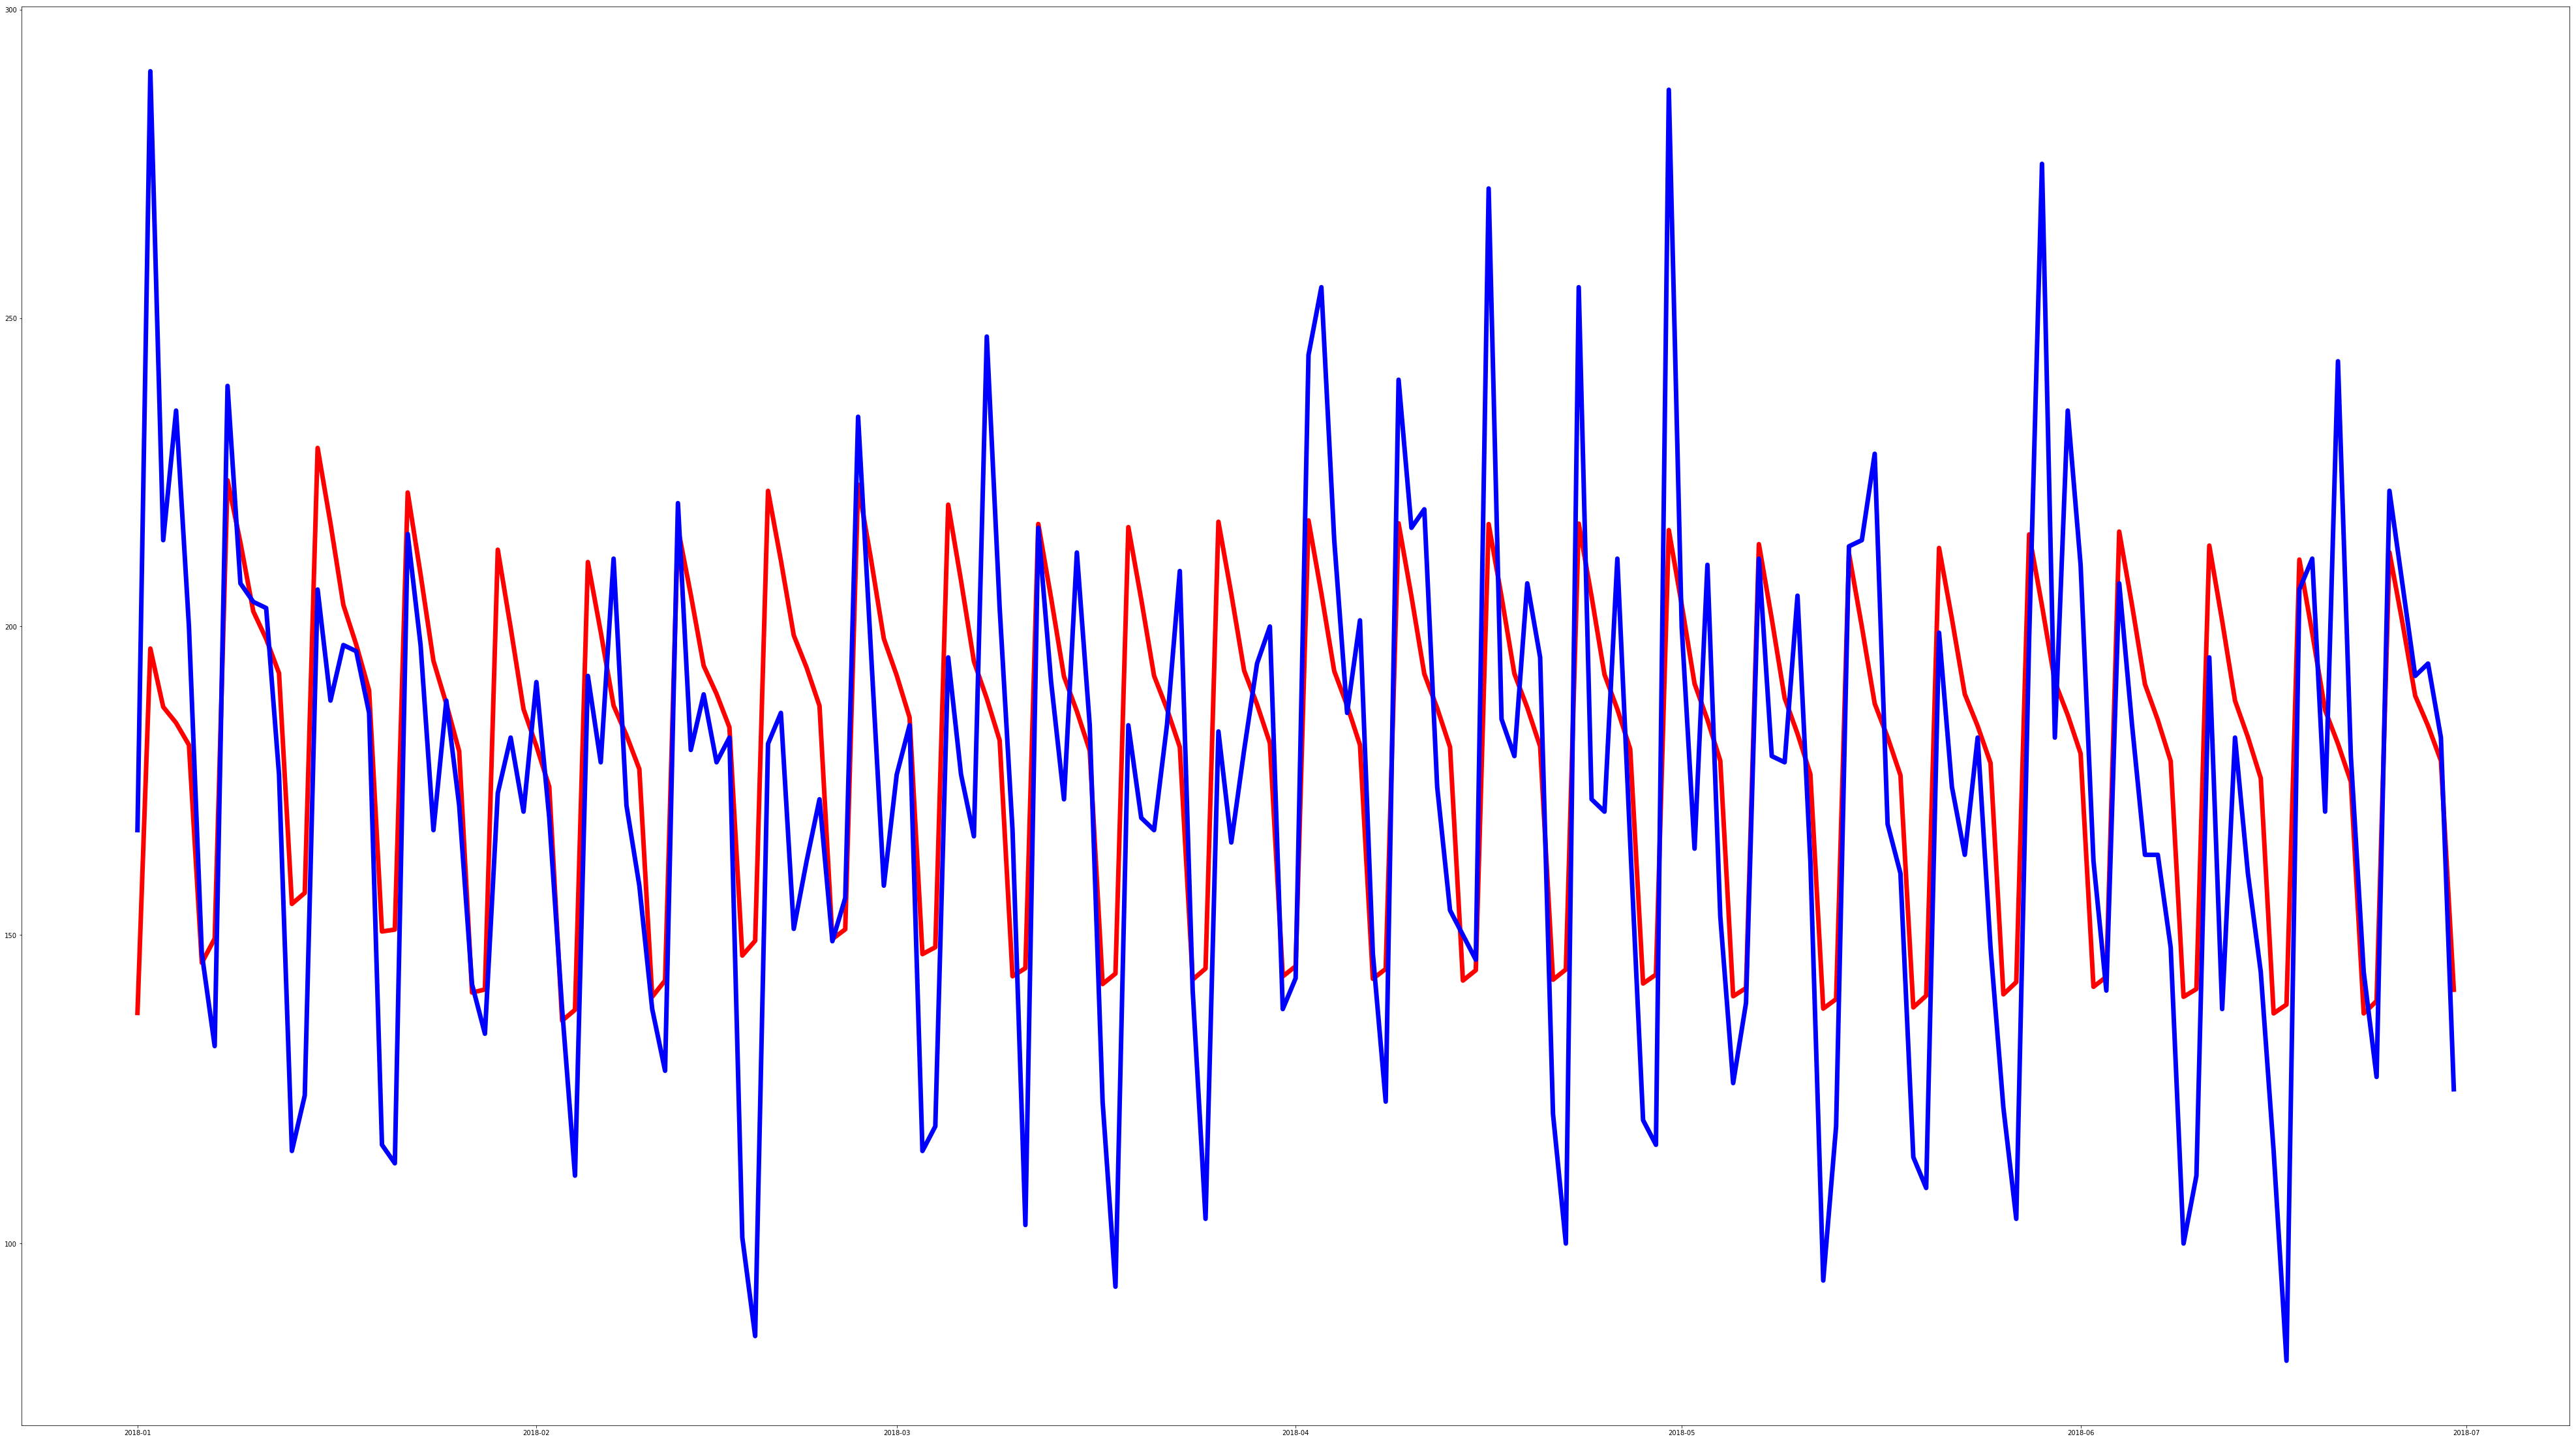

In [13]:
def plotdaily(dataframe):
    last6=dataframe
    fig=plt.figure(figsize=(70,40))
    plt.plot(last6['ds'],last6['yhat'],color='red',linewidth=7)
    plt.plot(last6['ds'],last6['y'],color='blue',linewidth=7)
plotdaily(last6)

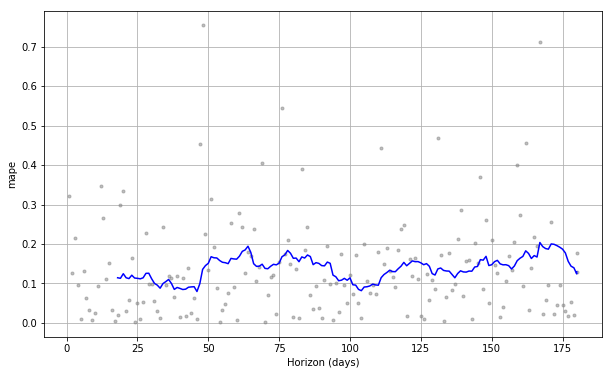

In [14]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(last6, metric='mape')


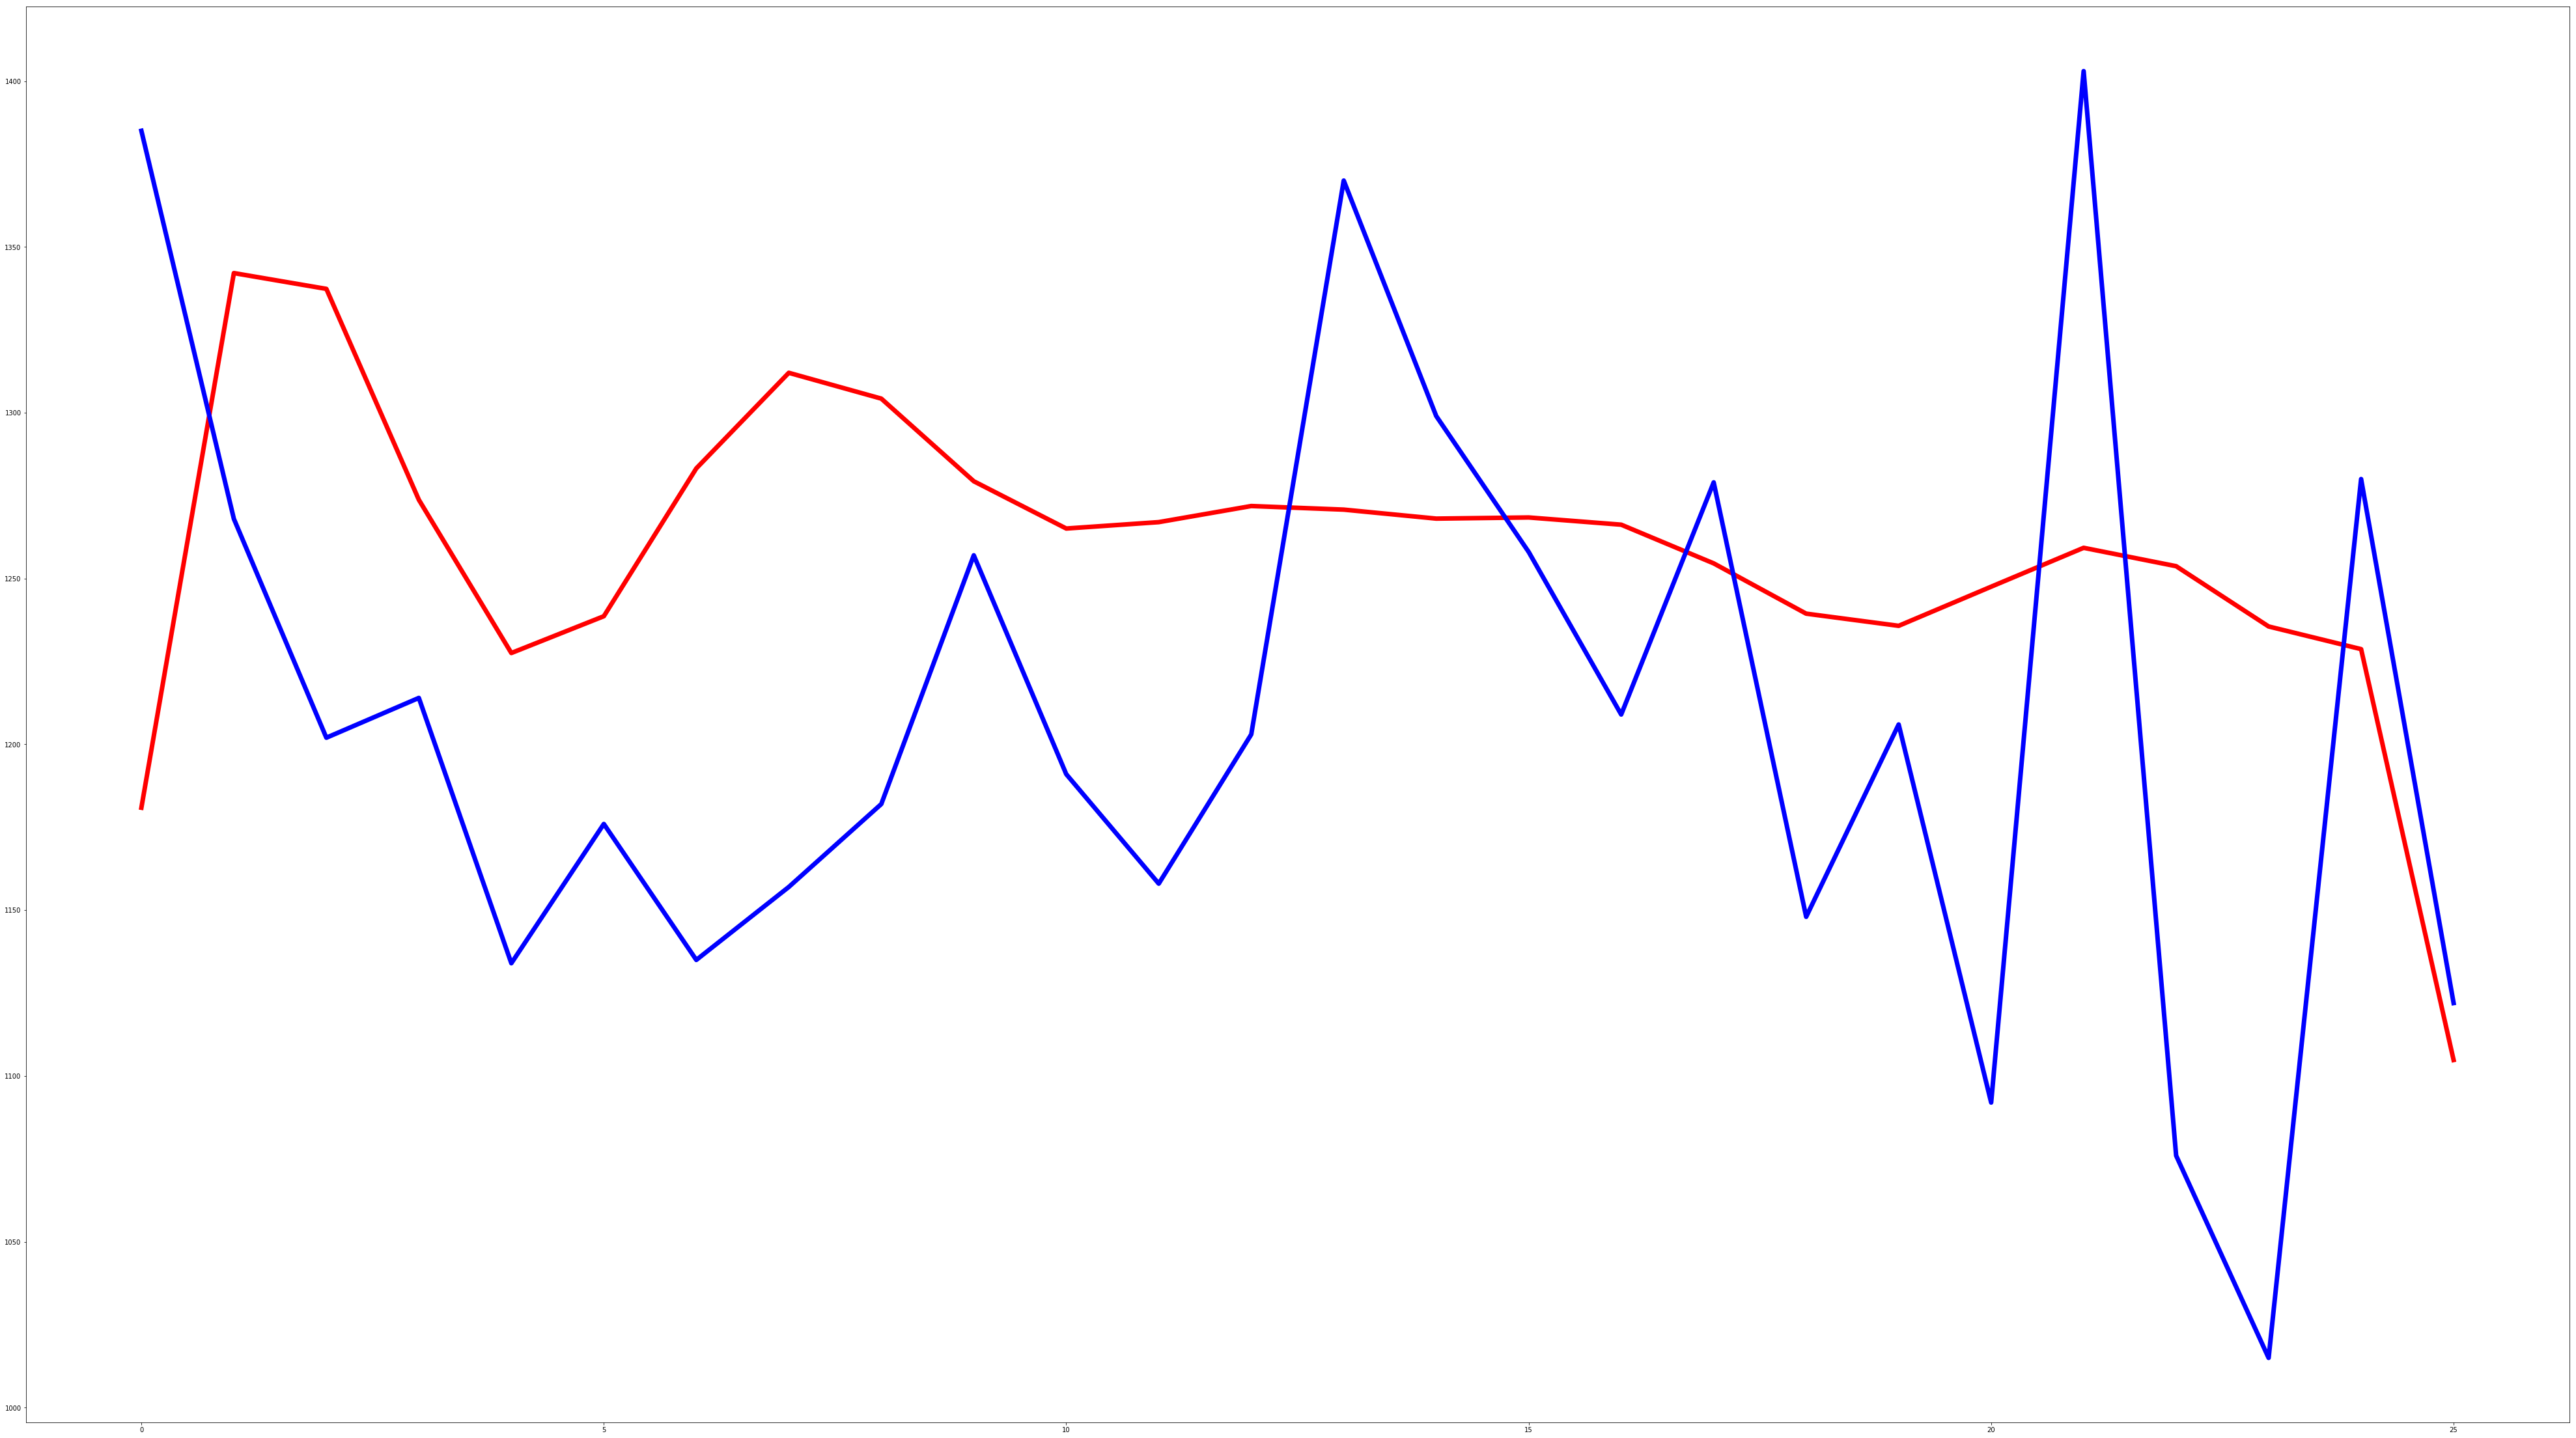

In [15]:
19/06/2018#weekly
def weekly(last6): 
    i=0
    k=0
    mape=pd.DataFrame(columns=['yhat','y'])
    while (i<len(last6)):
        s=last6.iloc[i:i+7]
        yhat=np.sum(s['yhat'])
        y=np.sum(s['y'])
        last6.loc[i:i+7,'weeklyyhat']=yhat
        last6.loc[i:i+7,'weeklyy']=y
        mape.loc[k,'yhat']=yhat
        mape.loc[k,'y']=y
        k=k+1
        i=i+7

    fig=plt.figure(figsize=(70,40))

    plt.plot(mape.index,mape['yhat'],color='red',linewidth=7)
    plt.plot(mape.index,mape['y'],color='blue',linewidth=7) 
    
weekly(last6)



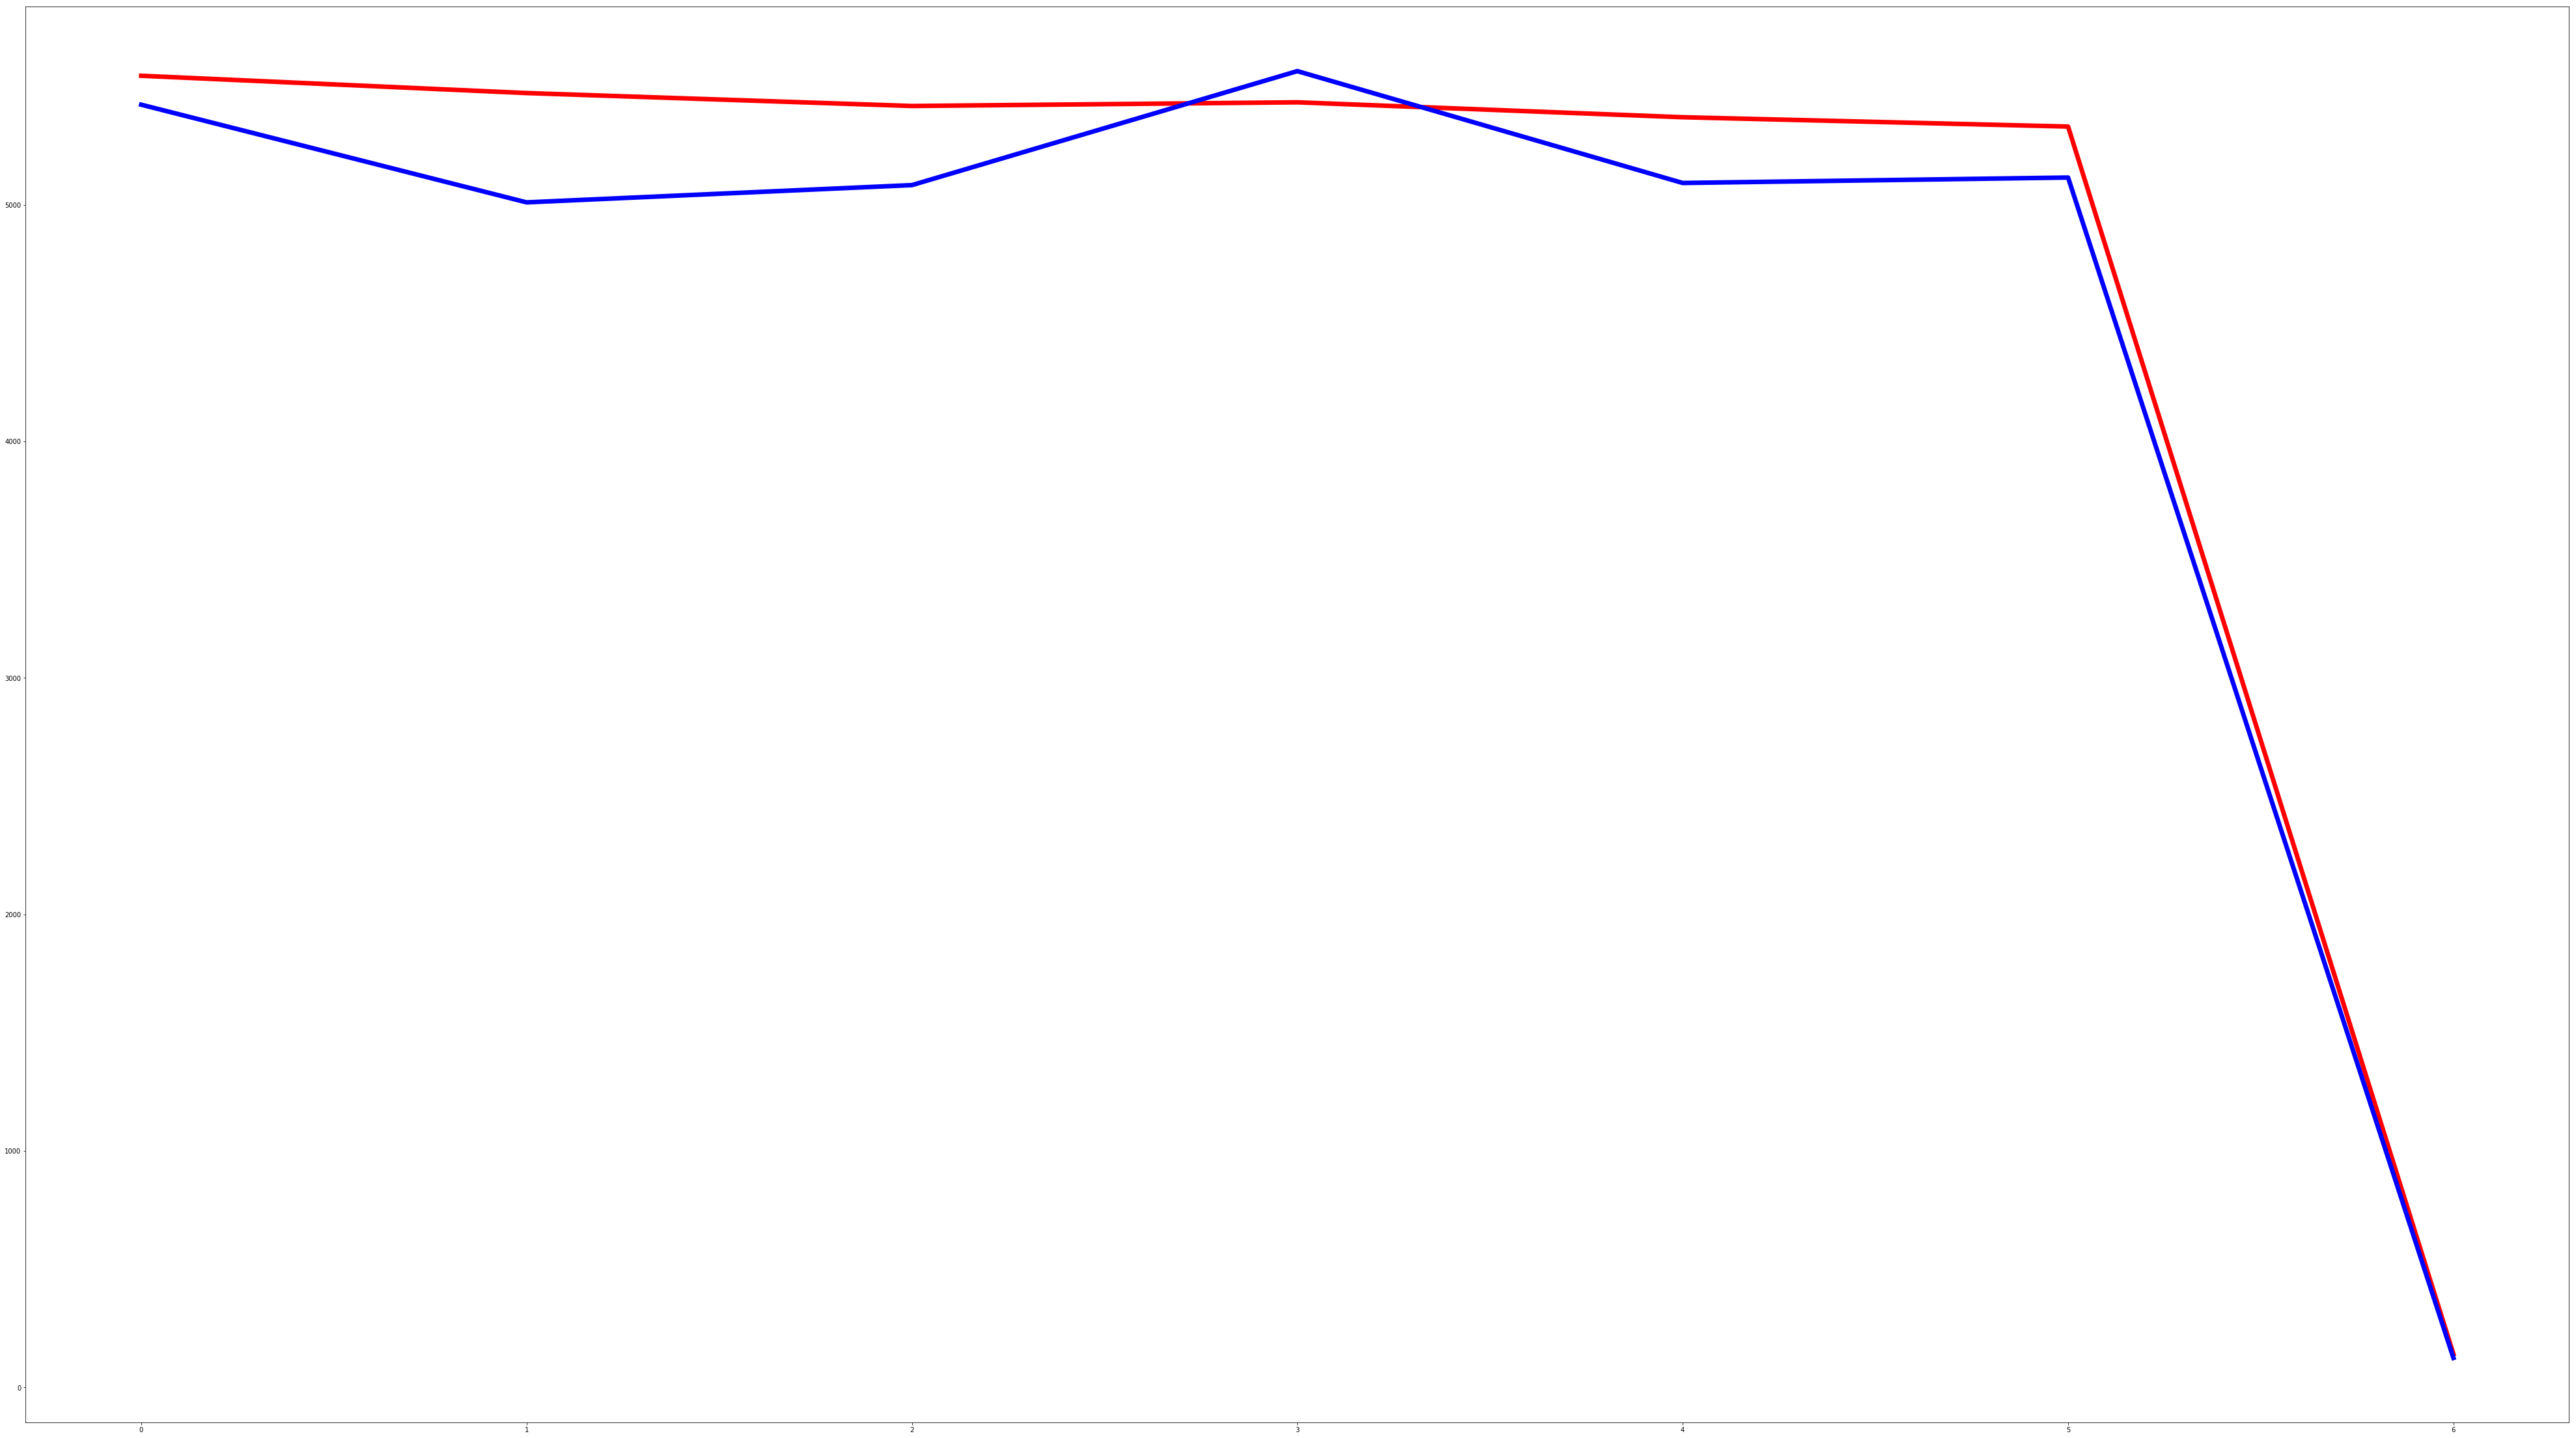

In [16]:
#monthly

def monthly(last6):    
    i=0
    k=0
    mape=pd.DataFrame(columns=['yhat','y'])
    while (i<len(last6)):
        s=last6.iloc[i:i+30]
        yhat=np.sum(s['yhat'])
        y=np.sum(s['y'])
        last6.loc[i:i+30,'weeklyyhat']=yhat
        last6.loc[i:i+30,'weeklyy']=y
        mape.loc[k,'yhat']=yhat
        mape.loc[k,'y']=y
        k=k+1
        i=i+30

    fig=plt.figure(figsize=(70,40))
    months=pd.Series(['Jan','Feb','March','April','May','June'])
    mape.reindex(index=months)
    plt.plot(mape.index,mape['yhat'],color='red',linewidth=7)
    plt.plot(mape.index,mape['y'],color='blue',linewidth=7)    


monthly(last6)    